In [35]:
import pypsa
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
from pypsa.plot import add_legend_lines, add_legend_patches, add_legend_semicircles


In [47]:
fn = "results/test-elec/networks/base_s_5_elec_.nc"
n = pypsa.Network(fn)
n.statistics()


INFO:pypsa.io:Imported network base_s_5_elec_.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


Optimal Capacity  Installed Capacity  \
Generator Combined-Cycle Gas        5078.30000          5078.30000   
          Offshore Wind (AC)        2261.80000          2261.80000   
          Onshore Wind              2410.90000          2410.90000   
          Solar                    27481.24641          5572.80000   
          biomass                     75.00000            75.00000   
          nuclear                   5919.00000          5919.00000   
          oil                        126.60000           126.60000   
Line      AC                       20868.79214         20868.79214   
Load      -                            0.00000             0.00000   

                                    Supply    Withdrawal  Energy Balance  \
Generator Combined-Cycle Gas  1.755316e+05  0.000000e+00    1.755316e+05   
          Offshore Wind (AC)  1.169297e+05  0.000000e+00    1.169297e+05   
          Onshore Wind        8.209251e+04  0.000000e+00    8.209251e+04   
          Solar               6.055289e+05  0.000000e+00    6.055289e+05   
          biomass             9.000000e+03  0.000000e+00    9.000000e+03   
          nuclear             7.549163e+05  0.000000e+00    7.549163e+05   
          oil                 0.000000e+00  0.000000e+00    0.000000e+00   
Line      AC                  1.114851e+06  1.114851e+06    0.000000e+00   
Load      -                   0.000000e+00  1.743999e+06   -1.743999e+06   

                              Transmission  Capacity Factor   Curtailment  \
Generator Combined-Cycle Gas       0.00000         0.205744  677622.84781   
          Offshore Wind (AC)       0.00000         0.307724       0.00000   
          Onshore Wind             0.00000         0.202682       0.00000   
          Solar                    0.00000         0.131156       0.00000   
          biomass                  0.00000         0.714286    3600.00000   
          nuclear                  0.00000         0.759174  123131.83904   
          oil                      0.00000         0.000000   21268.80000   
Line      AC                  626402.68949         0.317988       0.00000   
Load      -                        0.00000              NaN       0.00000   

                              Capital Expenditure  Operational Expenditure  \
Generator Combined-Cycle Gas         9.754691e+06             7.932183e+06   
          Offshore Wind (AC)         8.083808e+06             2.930622e+03   
          Onshore Wind               4.352188e+06             2.077123e+03   
          Solar                      1.546634e+07             1.204375e+04   
          biomass                    4.231659e+05             1.425447e+05   
          nuclear                    8.556587e+07             1.058611e+07   
          oil                        9.487992e+04             0.000000e+00   
Line      AC                         1.205077e+06             0.000000e+00   
Load      -                          0.000000e+00             0.000000e+00   

                                   Revenue  Market Value  
Generator Combined-Cycle Gas  7.932204e+06     45.189620  
          Offshore Wind (AC)  3.282714e+06     28.074243  
          Onshore Wind        1.964799e+06     23.933959  
          Solar               1.684421e+07     27.817351  
          biomass             3.616375e+05     40.181947  
          nuclear             2.699248e+07     35.755594  
          oil                 0.000000e+00      0.000000  
Line      AC                  0.000000e+00           NaN  
Load      -                  -5.737805e+07           NaN

/opt/anaconda3/envs/pypsa-eur/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x33e203500>,
 <matplotlib.collections.LineCollection at 0x33e202b40>)

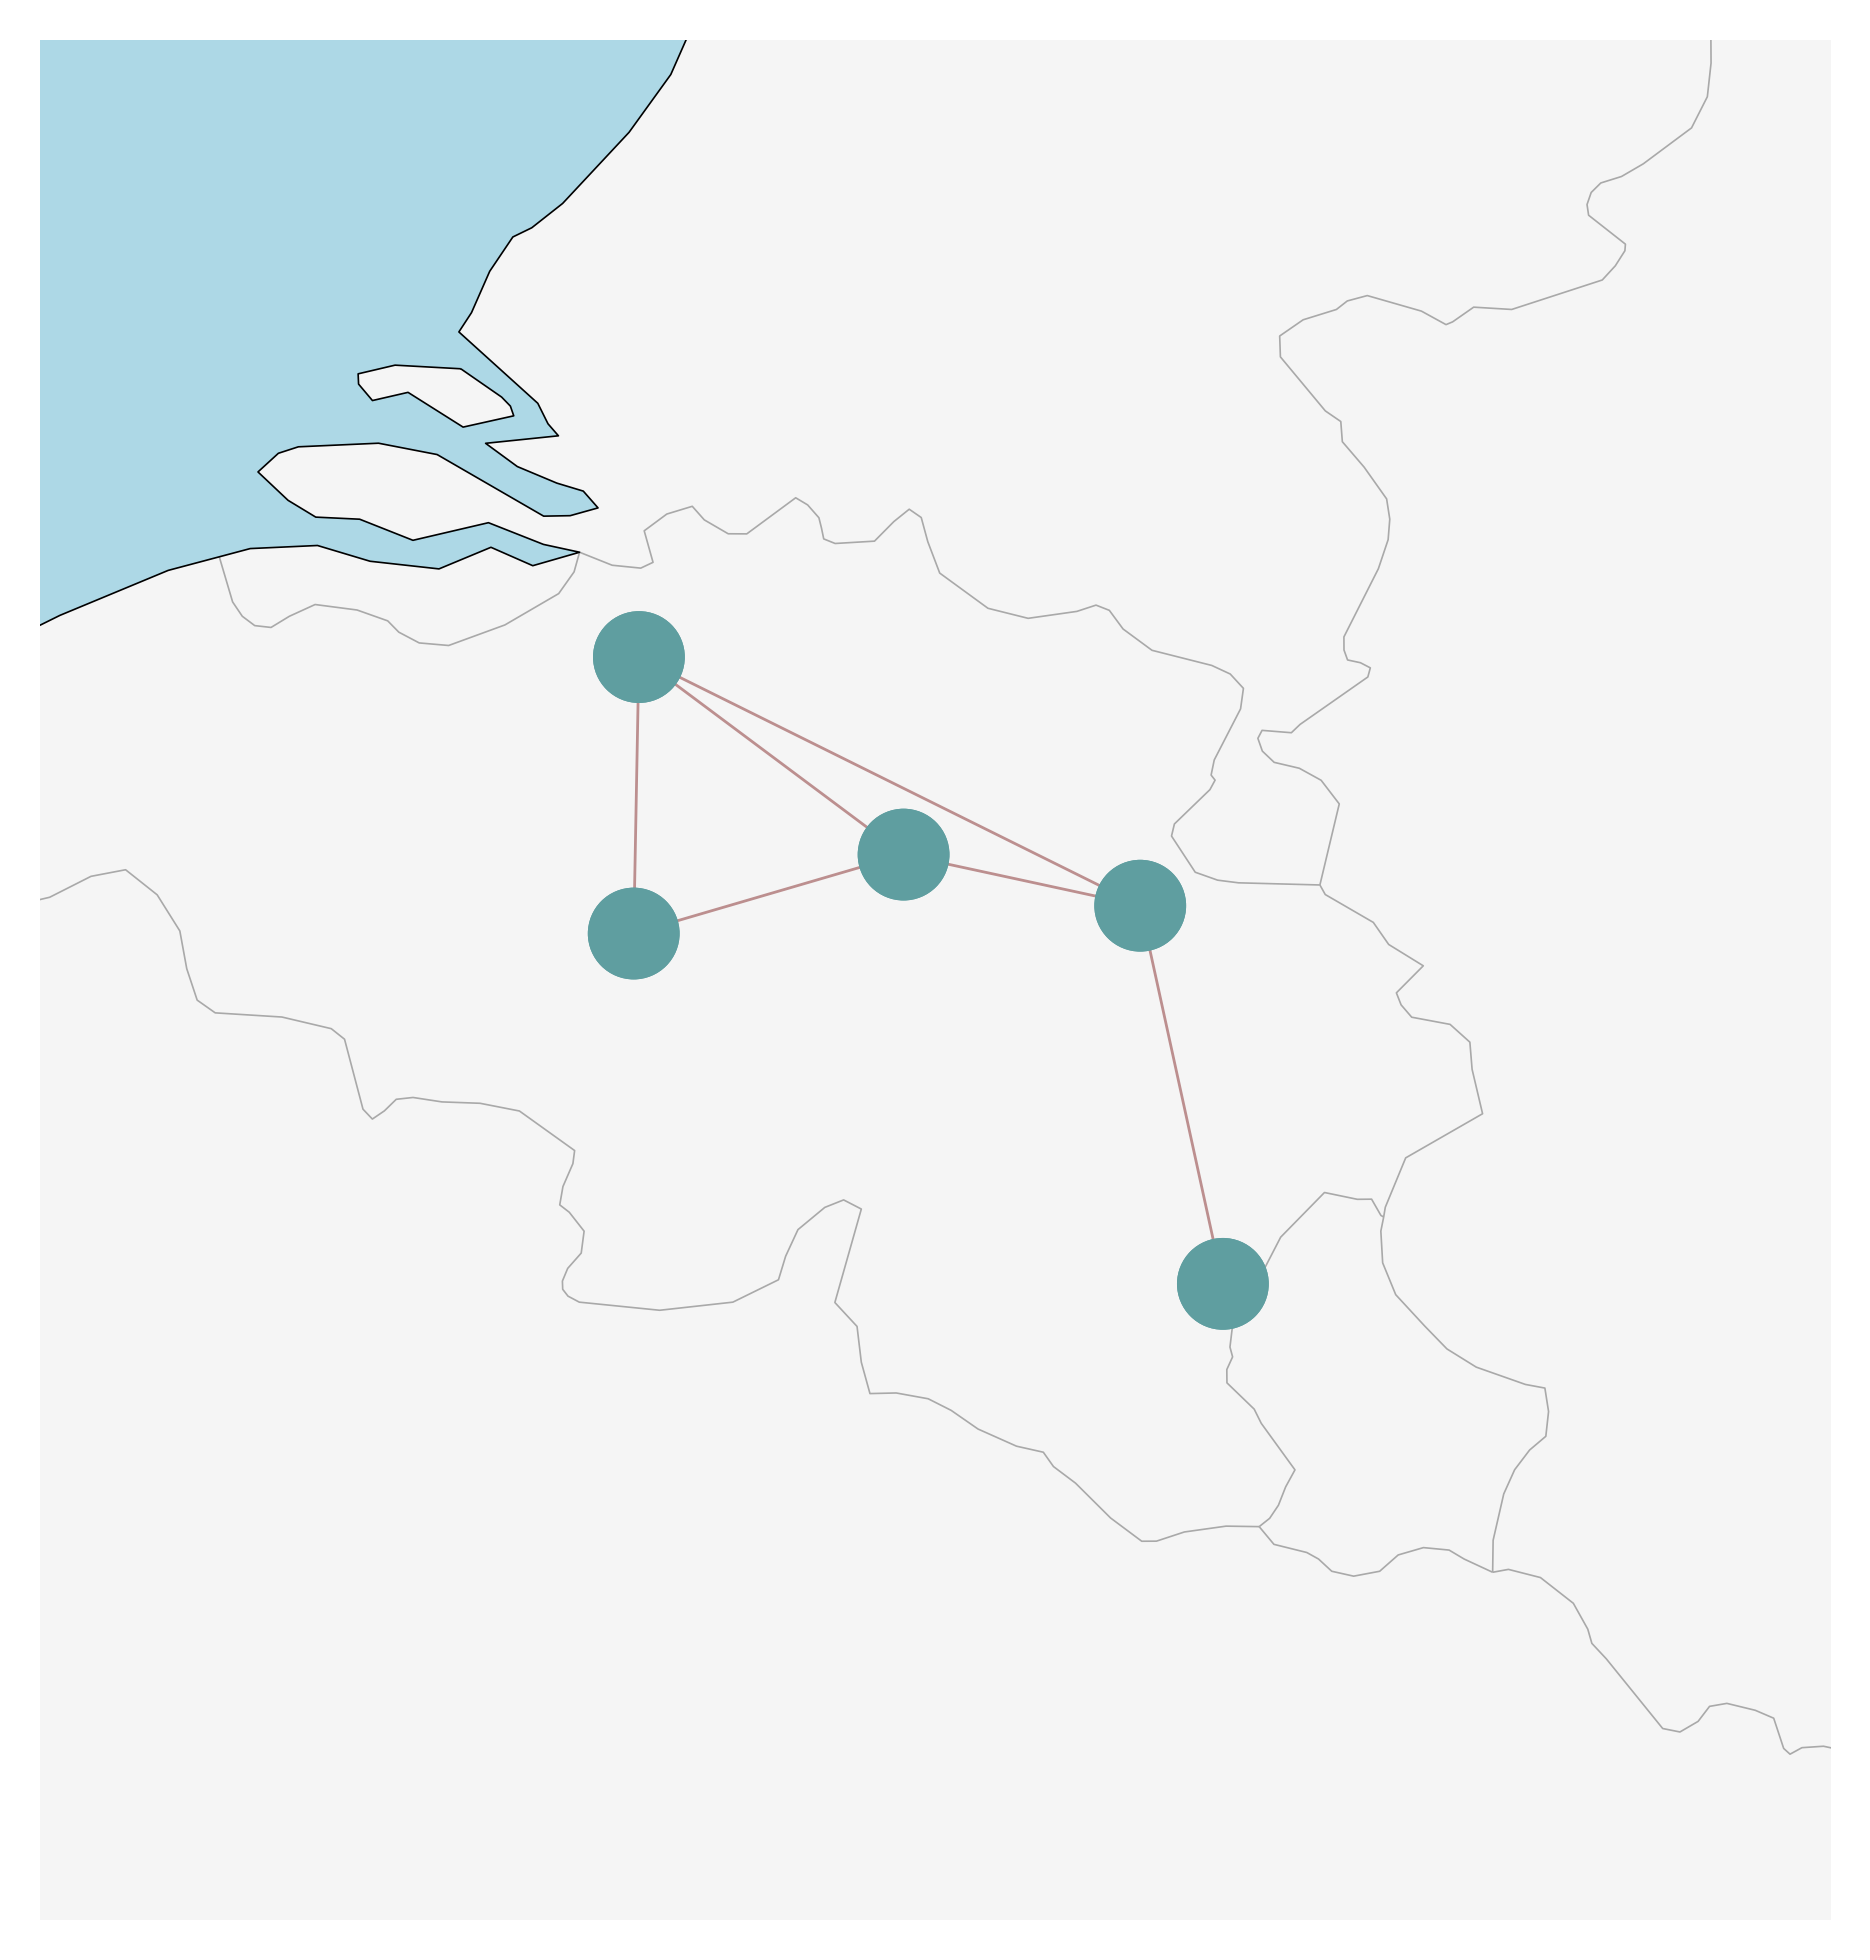

In [48]:
fig, ax = plt.subplots(figsize=(5,5), subplot_kw={"projection": ccrs.EqualEarth()})
n.plot( bus_sizes=0.01, line_widths=0.5, ax=ax, margin=1, color_geomap=True )

In [49]:
colors = {
    "Multiple": "pink",
    "AC": "black",
    "DC":"darkviolet",
    "biomass" : "forestgreen",
    "Brown Coal": "saddlebrown",
    "Combined-Cycle Gas": "darkorange",
    "Geothermal": "firebrick",
    "Hard Coal": "darkslategray",
    "nuclear": "mediumorchid",
    "oil": "peru",
    "Other": "dimgray",
    "Pumped Hydro": "cornflowerblue",
    "Run of River": "royalblue",
    "Solar": "gold",
    "Storage Hydro": "navy",
    "Waste": "olive",
    "Offshore Wind (AC)": "teal",
    "Onshore Wind": "turquoise",
    "solar-hsat": "goldenrod",
    "Offshore Wind (DC)": "deepskyblue",
    "Offshore Wind (Floating)": "dodgerblue",
    "Battery Storage" : "orange",
    "Hydrogen Storage" : "lightgray",
    "H2 fuel cell": "lightgray",
    "H2 electrolysis": "lightgray",
    "-": "darkred",
    "": "darkred",
}

n.carriers.color = n.carriers.nice_name.map(colors)



In [40]:
n.carriers.color

Carrier
AC                        black
DC                   darkviolet
nuclear            mediumorchid
oil                        peru
CCGT                 darkorange
biomass             forestgreen
offwind-dc          deepskyblue
solar-hsat            goldenrod
offwind-float        dodgerblue
offwind-ac                 teal
onwind                turquoise
solar                      gold
battery                  orange
H2                    lightgray
H2 electrolysis       lightgray
H2 fuel cell          lightgray
                        darkred
Name: color, dtype: object

/opt/anaconda3/envs/pypsa-eur/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x33e479070>,
 <matplotlib.collections.LineCollection at 0x33e4a6000>)

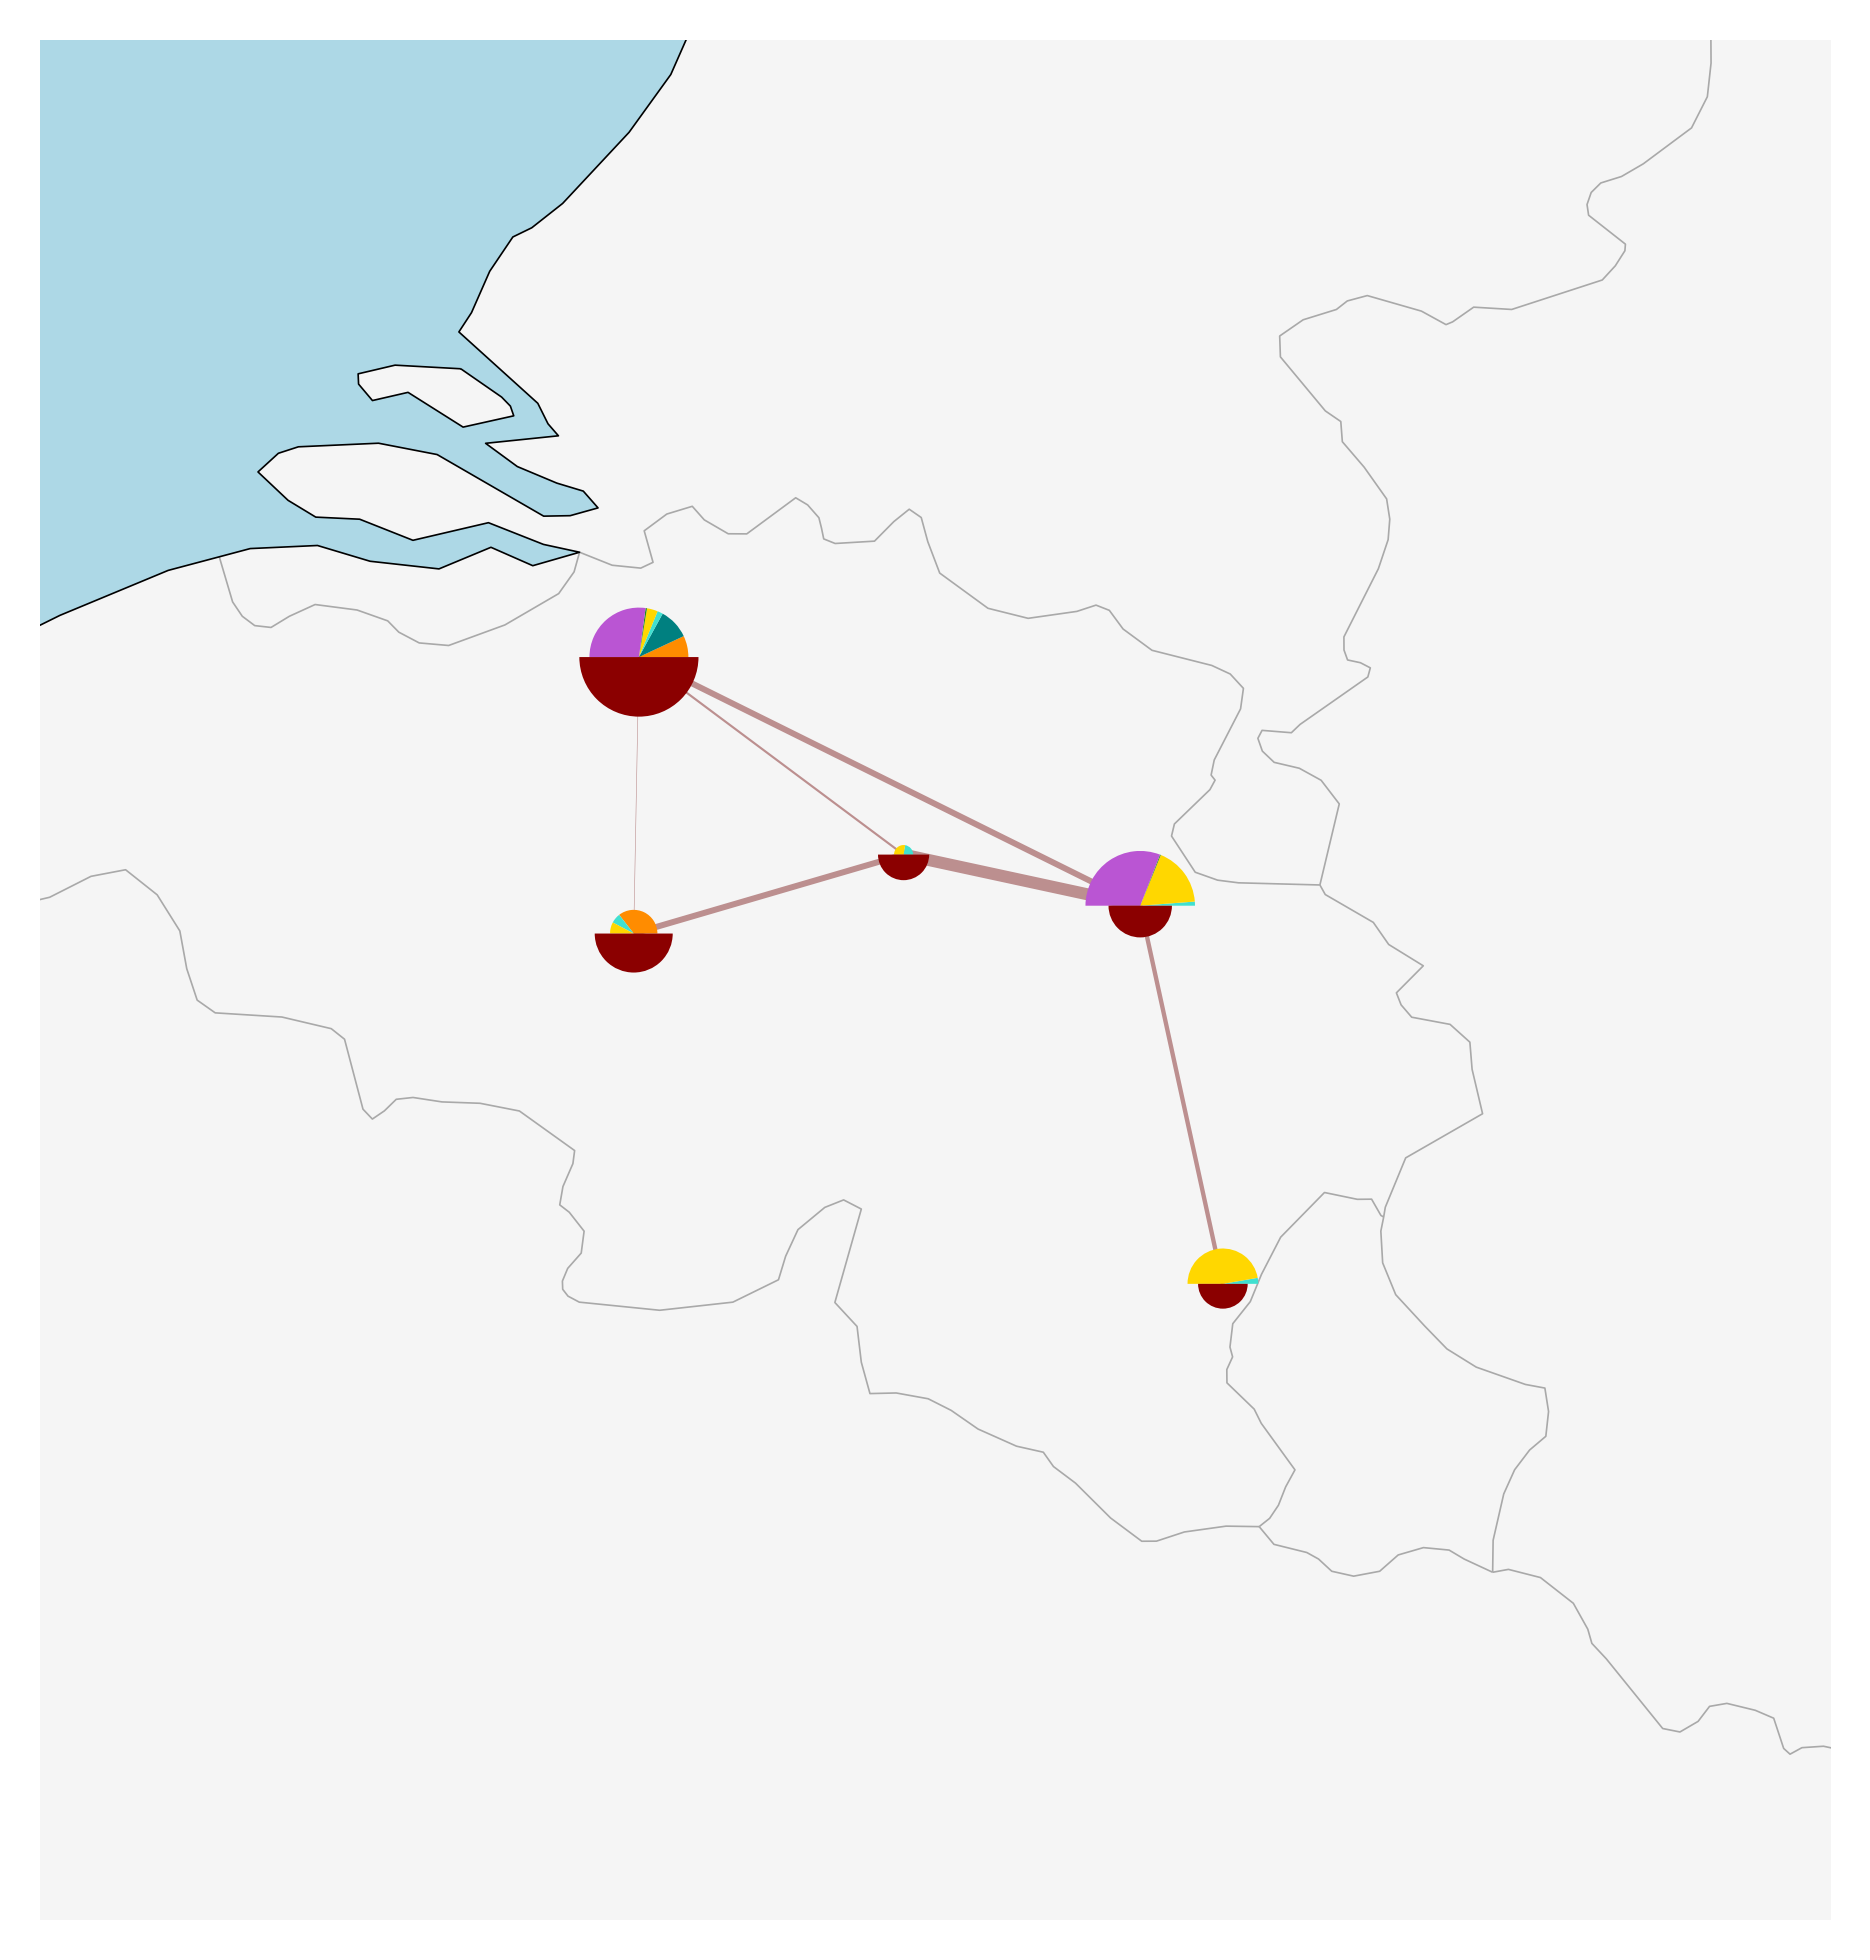

In [50]:
line_flow = n.lines_t.p0.sum(axis=0)
link_flow = n.links_t.p0.sum(axis=0)

eb = (
    n.statistics.energy_balance(
        groupby=["bus", "carrier"],
        comps=["Generator", "Load", "StorageUnit"],
    )
    .groupby([ "bus","carrier"])
    .sum()
)

bus_size_factor = 1e8
branch_width_factor = 8e3
branch_flow_factor = 8e4

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={"projection": ccrs.EqualEarth()})

n.plot(
    ax=ax,
    bus_sizes=eb / bus_size_factor,
    bus_split_circles=True,
    line_widths=line_flow / branch_width_factor,
    link_widths=link_flow / branch_width_factor,
    bus_colors=colors,
    margin=1,
    color_geomap=True

)



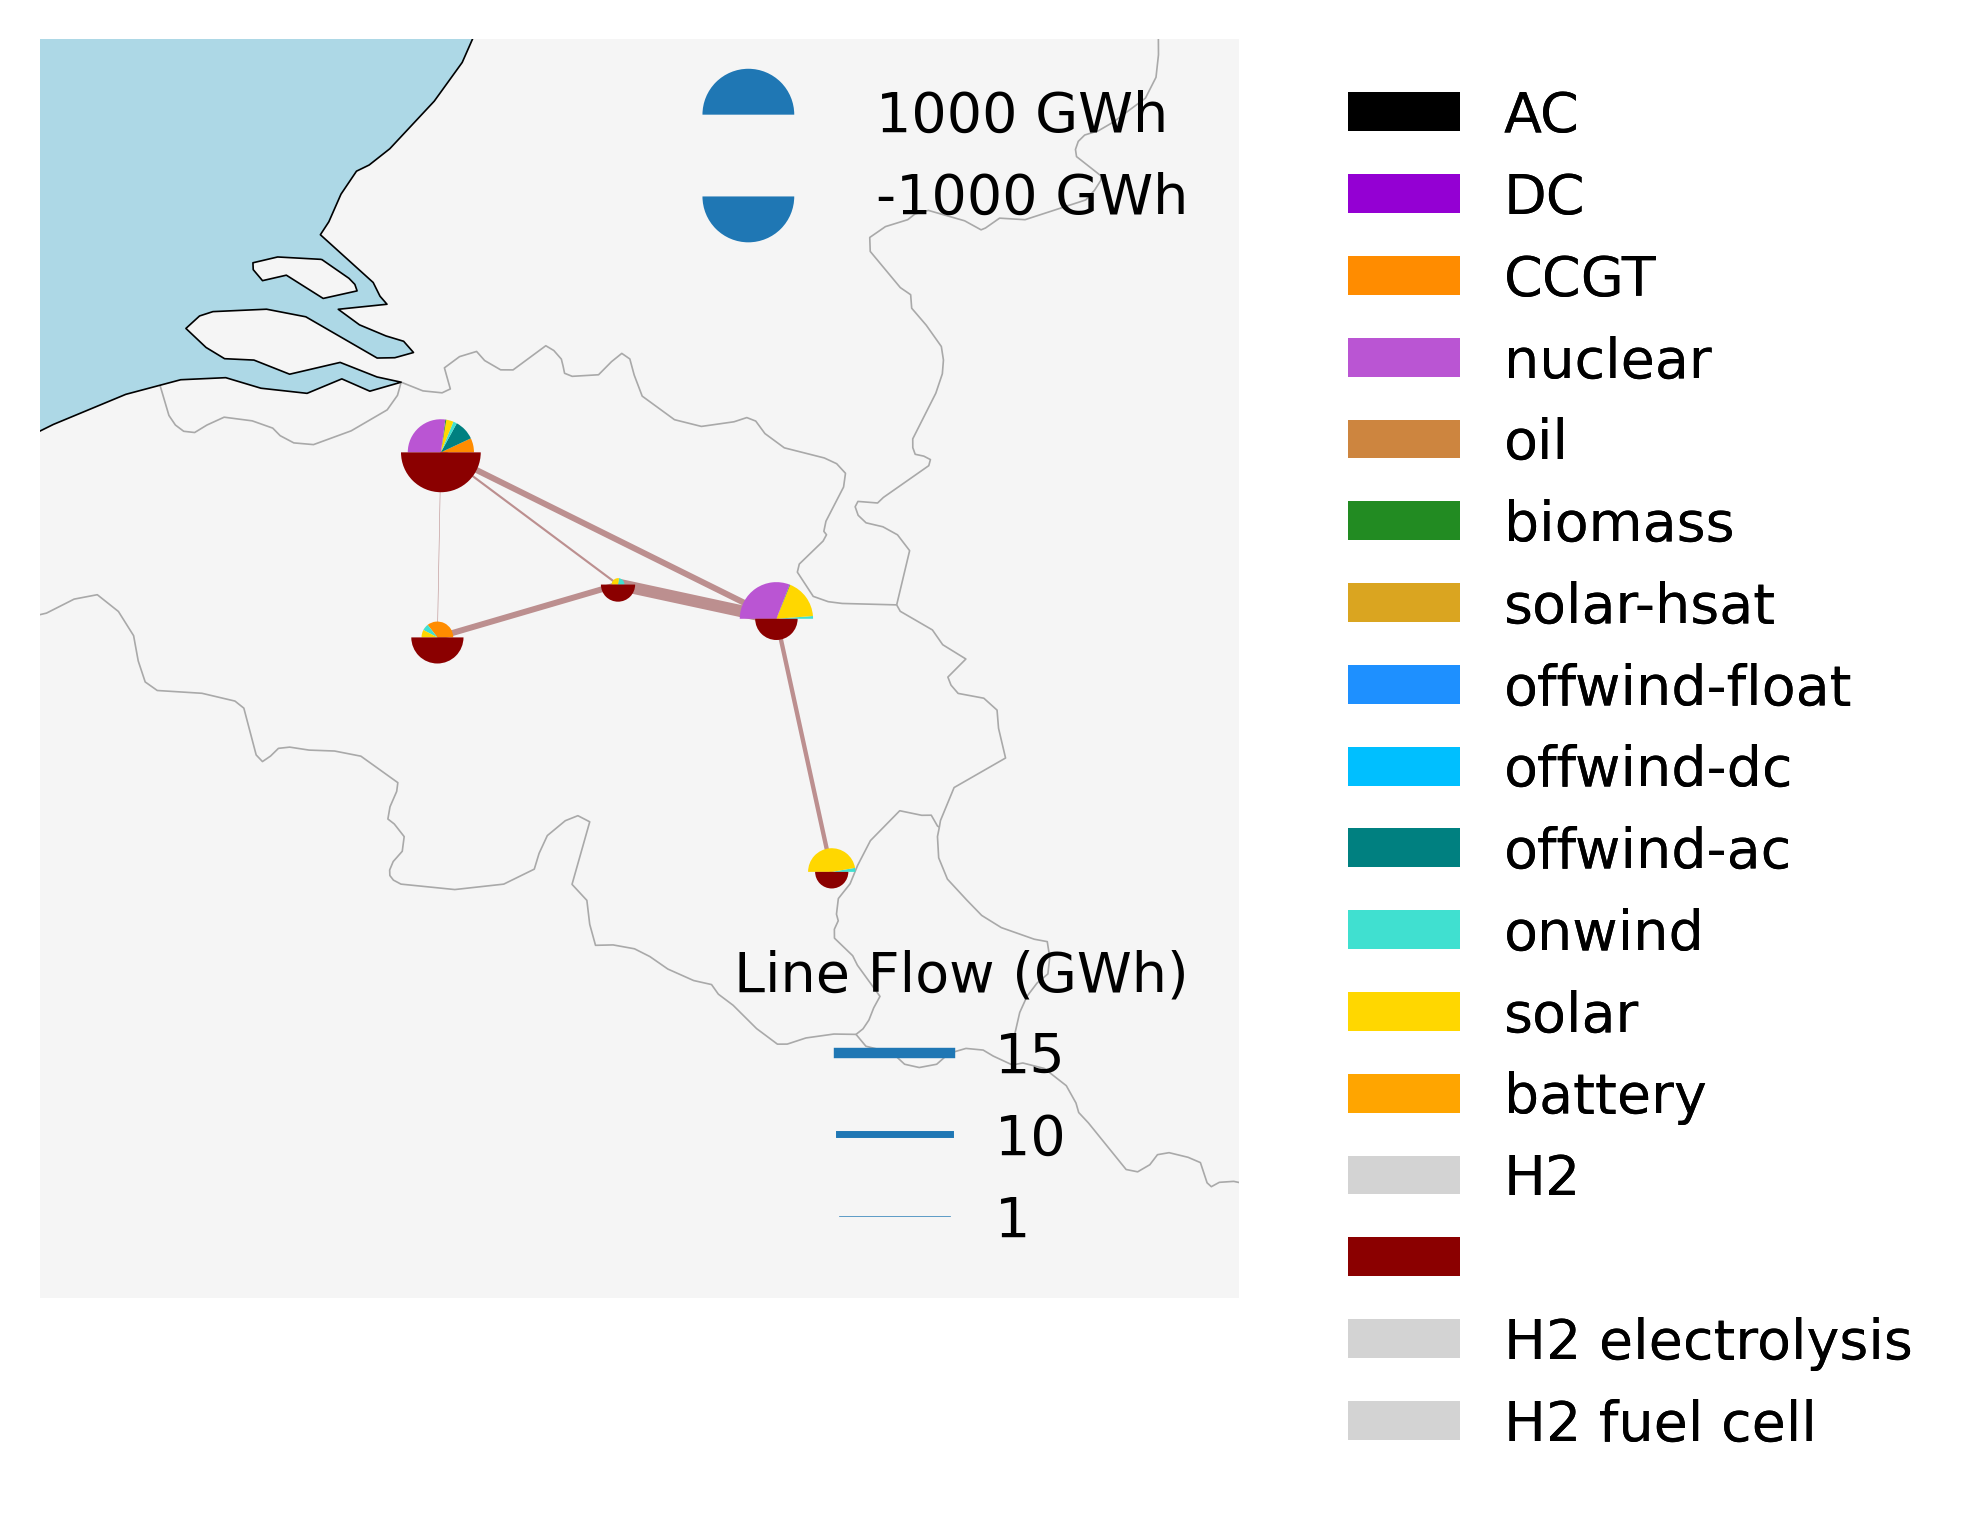

In [51]:
add_legend_lines(ax, 
            sizes= [branch/branch_width_factor for branch in [15000 ,10000, 1000]],
            labels= ["15", "10 ", "1 "],
            legend_kw = {"loc": "lower right", "frameon":False, "title":"Line Flow (GWh)"}
            )

add_legend_semicircles (ax,
            sizes= [bus/bus_size_factor for bus in [1000000, -1000000]],
            labels= ["1000 GWh", "-1000 GWh"],
            legend_kw= {"loc":'upper right', "frameon":False}
)

add_legend_patches(
    ax,
    colors=list(n.carriers.color),  # colors
    labels=list(n.carriers.index),  # labels
    legend_kw={
        "loc": "upper left",
        "bbox_to_anchor": (1.05, 1),
        "ncol": 1,
        "frameon": False,
    },
)

fig

In [43]:

print(f"Max line flow: {line_flow.abs().max()}")
print(f"Min line flow: {line_flow.abs().min()}")

print(f" Max node energy balance: {eb.groupby(['bus', 'carrier']).sum().abs().max()}")
print(f" Min node energy balance: {eb.groupby(['bus', 'carrier']).sum().abs().min()}")

Max line flow: 19406.872029476104
Min line flow: 2249.012390556521
 Max node energy balance: 842633.09479
 Min node energy balance: 3600.0


<Axes: xlabel='carrier', ylabel='Optimal Installed Capacity [MW]'>

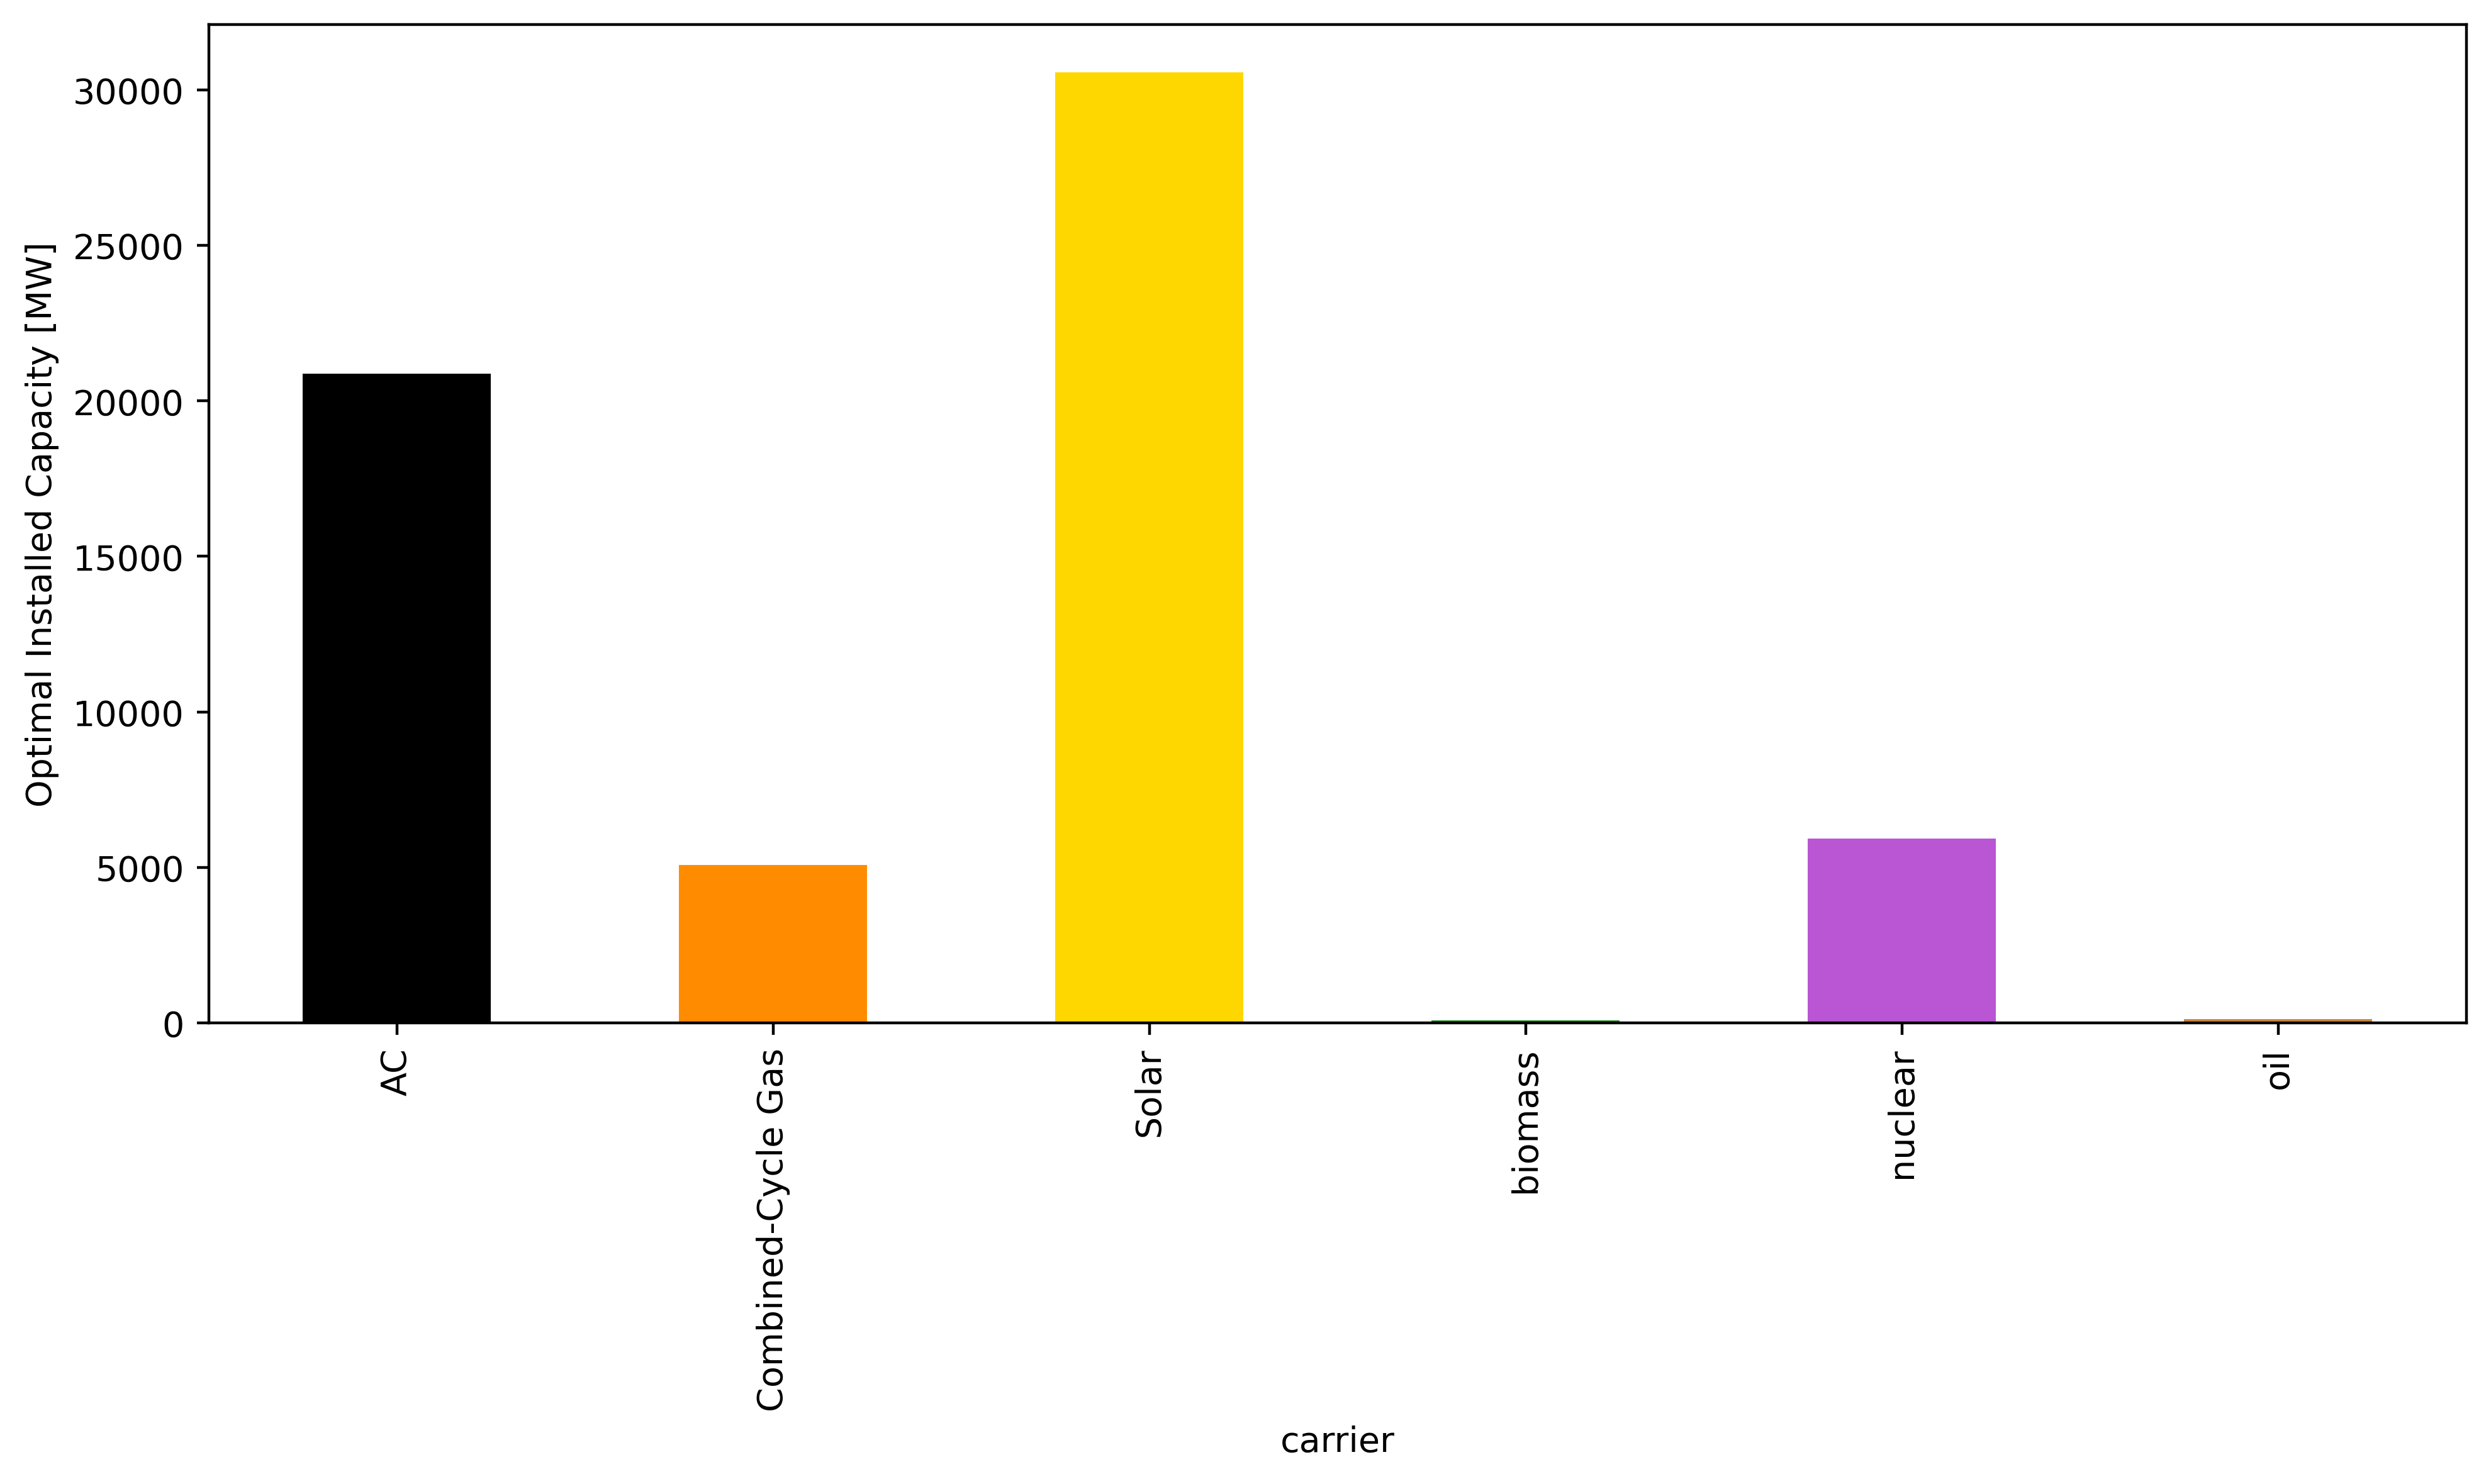

In [44]:
stat=n.statistics.optimal_capacity(groupby=["carrier"]).groupby(['carrier']).sum()


fig,ax=plt.subplots(figsize=(10,6))
ax.set_ylabel('Optimal Installed Capacity [MW]')
ax.set_xlabel('Carrier')

color_list = [colors.get(c, "gray") for c in stat.index]
stat.plot.bar(ax=ax, color=color_list)

